In [1]:
import cv2
import numpy as np

In [2]:
# Пример 1
img = cv2.imread('generated_image.png')

cv2.imshow('', img)

example_filter_1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
img_with_example_filter_1 = cv2.filter2D(img, ddepth=-1, kernel=example_filter_1)

cv2.imshow('', img_with_example_filter_1)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/hellcat/workspace/Lab2/.venv/lib/python3.11/site-packages/cv2/qt/plugins"


In [ ]:
# Пример 2
example_filter_2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
img_with_example_filter_2 = cv2.filter2D(img, ddepth=-1, kernel=example_filter_1)

cv2.imshow(img_with_example_filter_2)


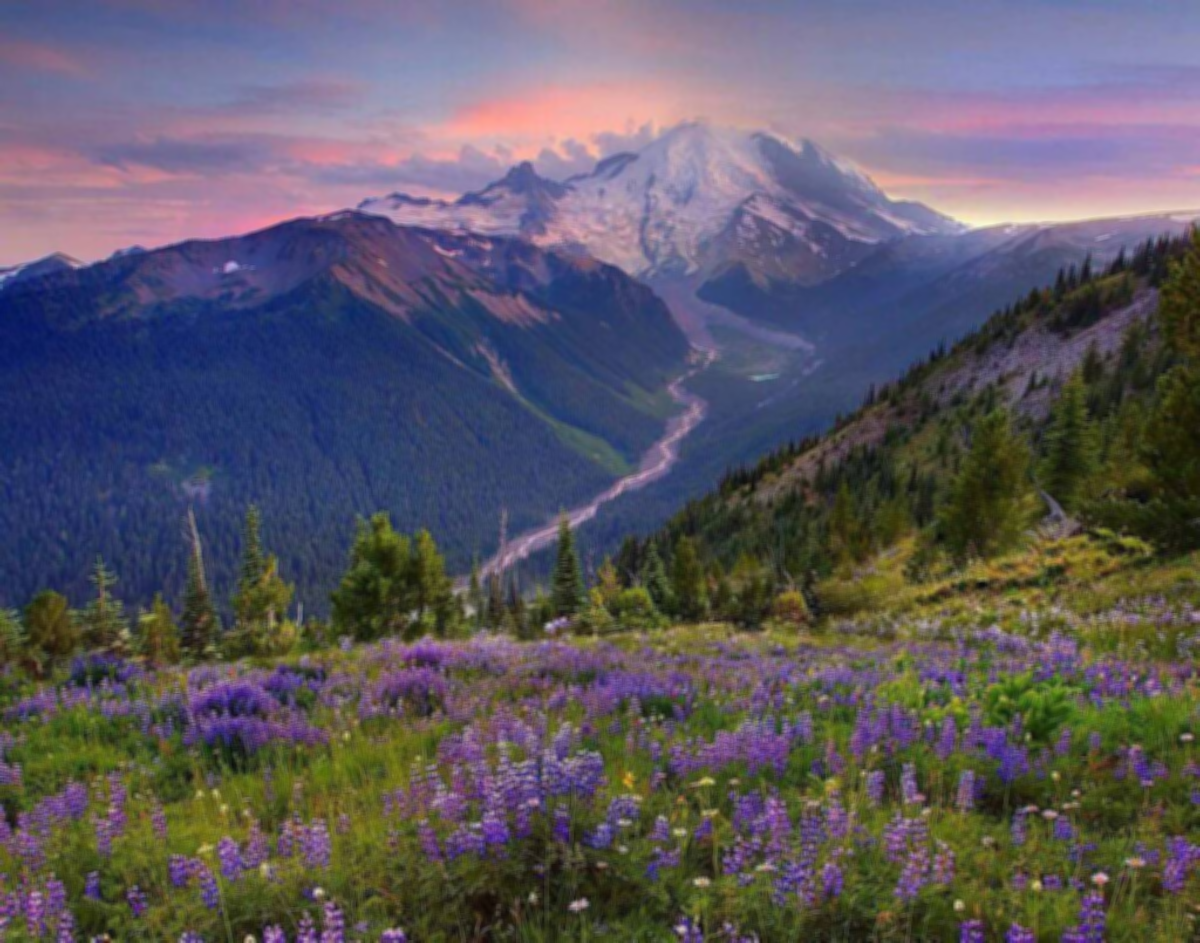

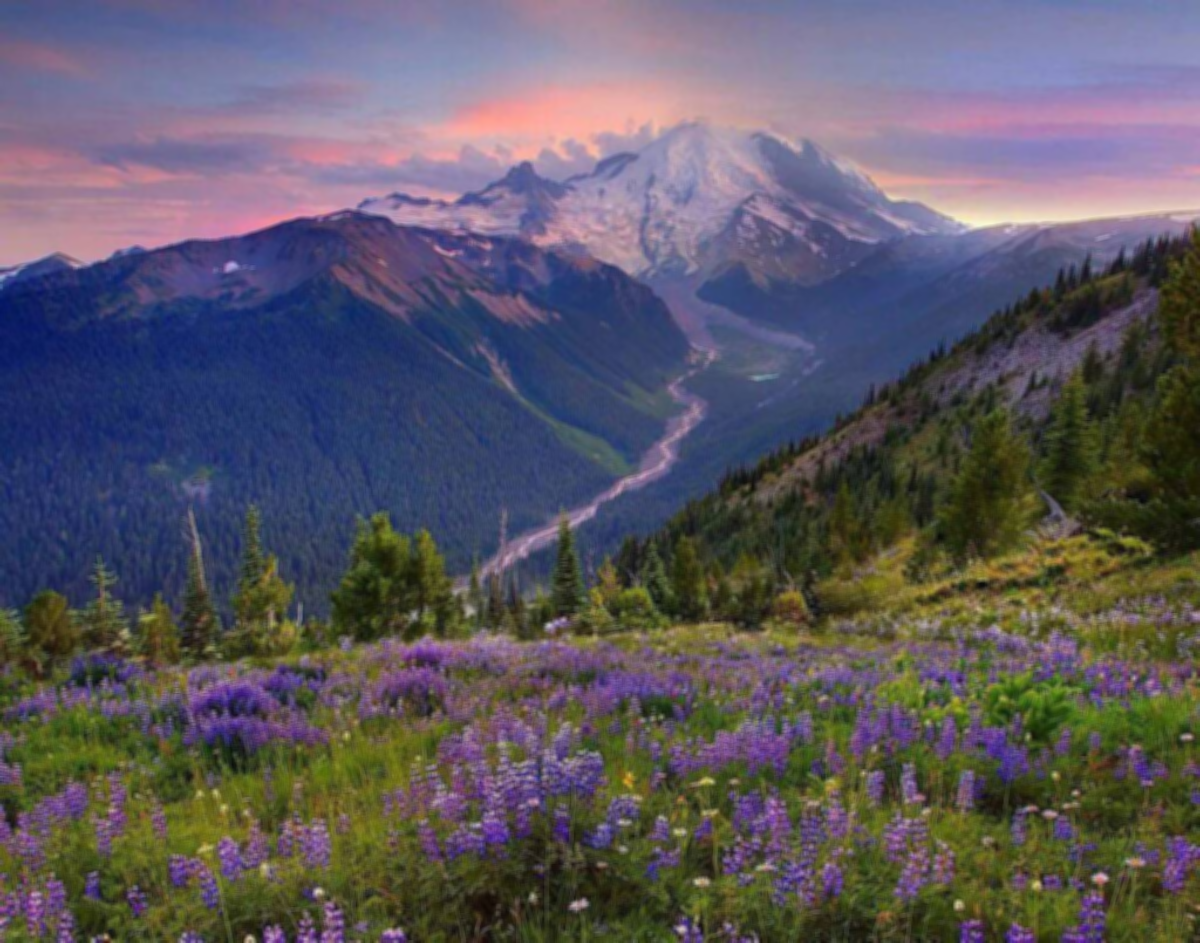

In [ ]:
# Пример фильтра (размытие)

# Простое
img_blur_5 = cv2.blur(img, (5,5))
cv2.imshow(img_blur_5)

# По Гауссу
gaussian_blur = cv2.GaussianBlur(img,(5, 5), 5)
cv2.imshow(gaussian_blur)

In [ ]:
#

In [ ]:
# Загрузка изображения

src = cv2.imread('/content/1695899454_gas-kvas-com-p-kartinki-znaki-dorozhnogo-dvizheniya-s-poy-9.jpg')
cv2.imshow(src)



In [ ]:
# Выделяем красные объекты на изображении
red_lower = np.array([0, 0, 50])
red_higher = np.array([50, 50, 255])
mask = cv2.inRange(src, red_lower, red_higher)
selection = cv2.bitwise_and(src, src, mask=mask)

cv2.imshow(selection)

In [ ]:
# Преобразуем в ЧБ
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)

cv2.imshow(gray)

# Определение границ оператором Кэнни
# Иногда сначала необходимо выполнить размытие, но не в нашем случае
canny = cv2.Canny(gray, 10, 250)

cv2.imshow(canny)

In [ ]:
# Перед поиском контуров иногда следует выполнить размытие,
# а также закрывать границы (прерывистый контур), однако
# в нашем случае этого не требуется
contours = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

cv2.drawContours( src, contours, -1, (0,255,0), 4 )
for cont in contours:
        #поиск периметра и определение количества углов
         sm = cv2.arcLength(cont, True)
         apd = cv2.approxPolyDP(cont, 0.03*sm, True)
        # выделение контуров
         #if len(apd) == 3:
         #cv2.drawContours(src, [apd], -1, (0,255,0), 4)
cv2.imshow(src)

In [ ]:
# Загрузка изображения

src = cv2.imread('/content/1695899454_gas-kvas-com-p-kartinki-znaki-dorozhnogo-dvizheniya-s-poy-9.jpg')

# Выделяем красные объекты на изображении
red_lower = np.array([0, 0, 50])
red_higher = np.array([50, 50, 255])
mask = cv2.inRange(src, red_lower, red_higher)
selection = cv2.bitwise_and(src, src, mask=mask)

# Преобразуем в ЧБ
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)

# Определение границ оператором Кэнни
canny = cv2.Canny(gray, 10, 250)

# Перед поиском контуров иногда следует выполнить размытие,
# а также закрывать границы (прерывистый контур), однако
# в нашем случае этого не требуется
contours = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

#cv2.drawContours( src, contours, -1, (0,255,0), 4 )
for cont in contours:
        #вычисление периметра и определение количества углов
         sm = cv2.arcLength(cont, True)
         apd = cv2.approxPolyDP(cont, 0.02*sm, True)
        # выделение контуров
         if len(apd) == 3:
          cv2.drawContours(src, [cont], -1, (0,255,0), 10)
cv2.imshow(src)